In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier

#from xgboost import XGBClassifier

#from vecstack import stacking

from sklearn.model_selection import GridSearchCV

In [11]:
df=pd.read_csv(r"C:\Users\win10\Desktop\linear regression\20221001_Batch122_DSC7456_Ensemble2\BackOrders.csv",na_values=['$','#','Null'])

In [12]:
df.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1888279,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,15.0,...,0.0,-99.00,-99.00,0.0,No,No,Yes,Yes,No,No
1,1870557,7.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.50,0.28,0.0,Yes,No,No,Yes,No,No
2,1475481,258.0,15.0,10.0,10.0,77.0,184.0,46.0,132.0,256.0,...,0.0,0.54,0.70,0.0,No,No,No,Yes,No,No
3,1758220,46.0,2.0,0.0,0.0,0.0,0.0,1.0,2.0,6.0,...,0.0,0.75,0.90,0.0,Yes,No,No,Yes,No,No
4,1360312,2.0,2.0,0.0,4.0,6.0,10.0,2.0,2.0,5.0,...,0.0,0.97,0.92,0.0,No,No,No,Yes,No,No


In [13]:
df.tail(7)

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
61587,1845783,63.0,NaN,0.0,0.0,0.0,0.0,452.0,1715.0,3425.0,...,0.0,-99.00,-99.00,1.0,No,No,No,No,No,Yes
61588,1200539,0.0,2.0,0.0,8.0,8.0,8.0,0.0,1.0,1.0,...,0.0,0.79,0.78,0.0,Yes,No,No,Yes,No,Yes
61589,1221200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61590,1221201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61591,1221209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61592,1220987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61593,1289323,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df.isnull().sum()

sku                     0
national_inv            8
lead_time            3408
in_transit_qty          6
forecast_3_month        5
forecast_6_month        5
forecast_9_month        5
sales_1_month           5
sales_3_month           5
sales_6_month           5
sales_9_month           5
min_bank                5
potential_issue         5
pieces_past_due         5
perf_6_month_avg        5
perf_12_month_avg       5
local_bo_qty            5
deck_risk               5
oe_constraint           5
ppap_risk               5
stop_auto_buy           5
rev_stop                5
went_on_backorder       5
dtype: int64

In [9]:
df.shape

(61594, 23)

In [15]:
df.drop(df.tail(5).index,inplace=True)

In [16]:
df.isnull().sum()

sku                     0
national_inv            3
lead_time            3403
in_transit_qty          1
forecast_3_month        0
forecast_6_month        0
forecast_9_month        0
sales_1_month           0
sales_3_month           0
sales_6_month           0
sales_9_month           0
min_bank                0
potential_issue         0
pieces_past_due         0
perf_6_month_avg        0
perf_12_month_avg       0
local_bo_qty            0
deck_risk               0
oe_constraint           0
ppap_risk               0
stop_auto_buy           0
rev_stop                0
went_on_backorder       0
dtype: int64

In [17]:
df.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1888279,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,15.0,...,0.0,-99.00,-99.00,0.0,No,No,Yes,Yes,No,No
1,1870557,7.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.50,0.28,0.0,Yes,No,No,Yes,No,No
2,1475481,258.0,15.0,10.0,10.0,77.0,184.0,46.0,132.0,256.0,...,0.0,0.54,0.70,0.0,No,No,No,Yes,No,No
3,1758220,46.0,2.0,0.0,0.0,0.0,0.0,1.0,2.0,6.0,...,0.0,0.75,0.90,0.0,Yes,No,No,Yes,No,No
4,1360312,2.0,2.0,0.0,4.0,6.0,10.0,2.0,2.0,5.0,...,0.0,0.97,0.92,0.0,No,No,No,Yes,No,No


In [19]:
df.dtypes

sku                    int64
national_inv         float64
lead_time            float64
in_transit_qty       float64
forecast_3_month     float64
forecast_6_month     float64
forecast_9_month     float64
sales_1_month        float64
sales_3_month        float64
sales_6_month        float64
sales_9_month        float64
min_bank             float64
potential_issue       object
pieces_past_due      float64
perf_6_month_avg     float64
perf_12_month_avg    float64
local_bo_qty         float64
deck_risk             object
oe_constraint         object
ppap_risk             object
stop_auto_buy         object
rev_stop              object
went_on_backorder     object
dtype: object

In [20]:
df.columns

Index(['sku', 'national_inv', 'lead_time', 'in_transit_qty',
       'forecast_3_month', 'forecast_6_month', 'forecast_9_month',
       'sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month',
       'min_bank', 'potential_issue', 'pieces_past_due', 'perf_6_month_avg',
       'perf_12_month_avg', 'local_bo_qty', 'deck_risk', 'oe_constraint',
       'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder'],
      dtype='object')

In [21]:
df.drop('sku',axis=1,inplace=True)

In [23]:
df.nunique()

national_inv         2915
lead_time              28
in_transit_qty        908
forecast_3_month     1623
forecast_6_month     2195
forecast_9_month     2664
sales_1_month        1092
sales_3_month        1928
sales_6_month        2679
sales_9_month        3220
min_bank             1098
potential_issue         2
pieces_past_due       190
perf_6_month_avg      102
perf_12_month_avg     102
local_bo_qty          201
deck_risk               2
oe_constraint           2
ppap_risk               2
stop_auto_buy           2
rev_stop                2
went_on_backorder       2
dtype: int64

In [27]:
X=df.drop('went_on_backorder',axis=1)

In [31]:
y=df['went_on_backorder']

In [24]:
cat_cols=['potential_issue','deck_risk', 'oe_constraint','ppap_risk', 'stop_auto_buy', 'rev_stop']

In [32]:
num_cols = X.drop(cat_cols,axis=1)

In [33]:
num_cols.columns

Index(['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month',
       'forecast_6_month', 'forecast_9_month', 'sales_1_month',
       'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank',
       'pieces_past_due', 'perf_6_month_avg', 'perf_12_month_avg',
       'local_bo_qty'],
      dtype='object')

In [34]:
num_cols=num_cols.columns

In [35]:
X[cat_cols] = X[cat_cols].astype('category')

In [52]:
X.dtypes

national_inv          float64
lead_time             float64
in_transit_qty        float64
forecast_3_month      float64
forecast_6_month      float64
forecast_9_month      float64
sales_1_month         float64
sales_3_month         float64
sales_6_month         float64
sales_9_month         float64
min_bank              float64
potential_issue      category
pieces_past_due       float64
perf_6_month_avg      float64
perf_12_month_avg     float64
local_bo_qty          float64
deck_risk            category
oe_constraint        category
ppap_risk            category
stop_auto_buy        category
rev_stop             category
dtype: object

In [65]:
X.shape

(61589, 21)

In [36]:
y=y.astype('category')

In [37]:
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size=0.3,random_state=0)

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [40]:
numeric_transformer = Pipeline(steps=[('missing_value',SimpleImputer(strategy='mean')),
                     ('scalar1',StandardScaler())])

In [41]:
categorical_transformer = Pipeline(steps=[('missing_value1',SimpleImputer(strategy='most_frequent')),
                                     ('onehotencode',OneHotEncoder(handle_unknown='ignore') )])

In [42]:
preprocessor=ColumnTransformer(transformers=[('num',numeric_transformer, num_cols),('cat',categorical_transformer,cat_cols)])

In [43]:
RF_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier())])

In [44]:
RF_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('missing_value',
                                                                   SimpleImputer()),
                                                                  ('scalar1',
                                                                   StandardScaler())]),
                                                  Index(['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month',
       'forecast_6_month', 'forecast_9_month', 'sales_1_month',
       'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank',
       'pieces_past_due', 'perf_6_month_avg', 'perf_12_month_avg',
       'local_bo_qty'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('missing_value1',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencode',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['potential_issue',
                                                   'deck_risk', 'oe_constraint',
                                                   'ppap_risk', 'stop_auto_buy',
                                                   'rev_stop'])])),
                ('classifier', RandomForestClassifier())])

In [45]:
train_pred_RFPipe = RF_pipe.predict(X_train)
test_pred_RFPipe = RF_pipe.predict(X_test)

In [46]:
def evaluate_model(act, pred):
    from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
    print("Confusion Matrix \n", confusion_matrix(act, pred))
    print("Accurcay : ", accuracy_score(act, pred))
    print("Recall   : ", recall_score(act, pred, average='weighted'))
    print("Precision: ", precision_score(act, pred, average='weighted'))  

In [47]:
print("--Train--")
evaluate_model(y_train, train_pred_RFPipe)
print("--Test--")
evaluate_model(y_test, test_pred_RFPipe)

--Train--
Confusion Matrix 
 [[35235    40]
 [   59  7778]]
Accurcay :  0.99770365559473
Recall   :  0.99770365559473
Precision:  0.9977021374607877
--Test--
Confusion Matrix 
 [[14443   578]
 [  637  2819]]
Accurcay :  0.934242571846079
Recall   :  0.934242571846079
Precision:  0.9338341388517396


In [48]:
param_grid={'classifier__max_depth':[2,3,4,5,6,7,8,9]}

grid_search=GridSearchCV(RF_pipe,param_grid,cv=10)
grid_search

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('missing_value',
                                                                                          SimpleImputer()),
                                                                                         ('scalar1',
                                                                                          StandardScaler())]),
                                                                         Index(['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month',
       'forecast_6_month', 'forecast_9_month', 'sales_1_month',
       'sales_3_month', 'sales_6_month', 'sales_9_mont...
       'local_bo_qty'],
      dtype='object')),
                                                                        ('cat',
                                                                         Pipeline(steps=[('missing_value1',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehotencode',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['potential_issue',
                                                                          'deck_risk',
                                                                          'oe_constraint',
                                                                          'ppap_risk',
                                                                          'stop_auto_buy',
                                                                          'rev_stop'])])),
                                       ('classifier',
                                        RandomForestClassifier())]),
             param_grid={'classifier__max_depth': [2, 3, 4, 5, 6, 7, 8, 9]})

In [49]:
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

{'classifier__max_depth': 9}


In [50]:
grid_search.cv_results_

{'mean_fit_time': array([1.39420397, 1.64579506, 1.9233433 , 2.08519223, 2.36586735,
        2.84647536, 2.80900064, 3.16396592]),
 'std_fit_time': array([0.03888847, 0.0150503 , 0.07502022, 0.01868838, 0.09060218,
        0.27957976, 0.02210179, 0.17585165]),
 'mean_score_time': array([0.05914915, 0.06000452, 0.06438985, 0.06985826, 0.0730485 ,
        0.08326004, 0.07827454, 0.08337977]),
 'std_score_time': array([0.00636467, 0.00670996, 0.00483134, 0.00747136, 0.00782142,
        0.01490541, 0.00045213, 0.00912164]),
 'param_classifier__max_depth': masked_array(data=[2, 3, 4, 5, 6, 7, 8, 9],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'classifier__max_depth': 2},
  {'classifier__max_depth': 3},
  {'classifier__max_depth': 4},
  {'classifier__max_depth': 5},
  {'classifier__max_depth': 6},
  {'classifier__max_depth': 7},
  {'classifier__max_depth': 8},
  {'classifier__max_depth': 9}],
 '

In [51]:
pd.concat([pd.DataFrame(grid_search.cv_results_["params"]),pd.DataFrame(grid_search.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)

,classifier__max_depth,Accuracy
0,2,0.830651
1,3,0.867438
2,4,0.882747
3,5,0.891956
4,6,0.897059
5,7,0.901535
6,8,0.905247
7,9,0.908888


In [53]:
param_grid1={'classifier__n_estimators':[20,40,60,80,100,120],
              'classifier__max_depth':[3,4,5,6,7]}

grid_search1=GridSearchCV(RF_pipe,param_grid1,cv=10)
grid_search1

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('missing_value',
                                                                                          SimpleImputer()),
                                                                                         ('scalar1',
                                                                                          StandardScaler())]),
                                                                         Index(['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month',
       'forecast_6_month', 'forecast_9_month', 'sales_1_month',
       'sales_3_month', 'sales_6_month', 'sales_9_mont...
                                                                         Pipeline(steps=[('missing_value1',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehotencode',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['potential_issue',
                                                                          'deck_risk',
                                                                          'oe_constraint',
                                                                          'ppap_risk',
                                                                          'stop_auto_buy',
                                                                          'rev_stop'])])),
                                       ('classifier',
                                        RandomForestClassifier())]),
             param_grid={'classifier__max_depth': [3, 4, 5, 6, 7],
                         'classifier__n_estimators': [20, 40, 60, 80, 100,
                                                      120]})

In [55]:
grid_search1.fit(X_train, y_train)
print(grid_search1.best_params_)

{'classifier__max_depth': 7, 'classifier__n_estimators': 20}


In [78]:
grid_search1.cv_results_

{'mean_fit_time': array([0.48052127, 0.75289395, 1.06156464, 1.33922176, 1.63626683,
        1.87114437, 0.52652702, 0.85266364, 1.18934448, 1.62403352,
        1.84776185, 2.18076427, 0.57964766, 0.99135394, 1.32683098,
        1.7003212 , 2.04799936, 2.47468202, 0.60699043, 1.03921738,
        1.47021739, 1.92045801, 2.85897372, 3.97555745, 0.85887394,
        1.69387326, 2.1697861 , 2.94769421, 3.22582211, 4.16494975]),
 'std_fit_time': array([0.01506086, 0.01293143, 0.03171178, 0.04207307, 0.07649239,
        0.03290524, 0.0100048 , 0.01018692, 0.02339509, 0.09047045,
        0.02146753, 0.03135548, 0.01297945, 0.05016102, 0.01202242,
        0.02631706, 0.01965971, 0.05955157, 0.00858993, 0.01246837,
        0.049139  , 0.08413037, 1.70179839, 0.55286906, 0.01951145,
        0.24213745, 0.16665864, 0.25284438, 0.09463344, 0.36692565]),
 'mean_score_time': array([0.02812085, 0.0418673 , 0.04865324, 0.0546752 , 0.06405635,
        0.06922143, 0.02968524, 0.03905511, 0.0421804 , 0.05

In [59]:
pd.concat([pd.DataFrame(grid_search1.cv_results_["params"]),pd.DataFrame(grid_search1.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)

,classifier__max_depth,classifier__n_estimators,Accuracy
0,3,20,0.866325
1,3,40,0.866835
2,3,60,0.867856
3,3,80,0.867833
4,3,100,0.867253
5,3,120,0.865722
6,4,20,0.880358
7,4,40,0.881773
8,4,60,0.883907
9,4,80,0.882678


In [63]:
features=X.columns
importances=grid_search1.best_estimator_['classifier'].feature_importances_

In [64]:
indices=np.argsort(importances)[::-1]
print(indices)

[ 0  3  4  5  2  6  9  7 14  8 10 13 11  1 12 18 22 23 17 24 21 19 15 16
 25 26 20]


In [66]:
print(importances)

[2.99254376e-01 1.05336076e-02 5.22085509e-02 2.06923403e-01
 1.22777614e-01 5.96079344e-02 4.67794277e-02 3.33880896e-02
 2.96500216e-02 3.35745933e-02 2.68616931e-02 1.20662810e-02
 1.03170089e-02 1.28185665e-02 3.29325245e-02 1.29052776e-04
 9.45284751e-05 1.48411670e-03 2.76619120e-03 1.85182385e-04
 0.00000000e+00 6.80553704e-04 2.03710410e-03 1.85184130e-03
 1.01266408e-03 3.36218301e-05 3.14515908e-05]


In [68]:
import  matplotlib.pyplot as plt

IndexError: index 22 is out of bounds for axis 0 with size 21

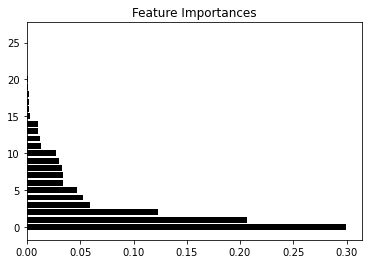

In [77]:
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='black')
plt.yticks(range(len(indices)), [features[i] for i in indices])
pt.xlabel('Relative importance')
plt.show()